In [1]:
import pandas as pd
from tqdm import tqdm
from pyarrow import csv
import pyarrow as pa

import numpy as np

import pandas as pd
from tqdm import tqdm
from pyarrow import csv
import pyarrow as pa

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from catboost import CatBoostClassifier
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve

In [2]:
df = pd.read_parquet('NF-UNSW-NB15-V2.parquet')
Y = df.Label
features_to_remove = ['L4_SRC_PORT', 'L4_DST_PORT', 'Attack', 'Label']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3,stratify=df.Attack, random_state=42)

In [4]:
X_train.drop(columns=features_to_remove, axis=1, inplace=True)
X_test.drop(columns=features_to_remove, axis=1, inplace=True)

In [5]:
X_test.columns

Index(['PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE'],
      dtype='object')

In [6]:
scaler = MinMaxScaler()

In [7]:
X_train = scaler.fit_transform(X_train)

In [8]:
X_test = scaler.transform(X_test)

In [10]:
clf = CatBoostClassifier(iterations=10)
clf.fit(X_train, y_train, verbose = False, early_stopping_rounds=100) 

In [11]:
accuracy_score(y_test, clf.predict(X_test))

0.9960723058131887

In [12]:
clf.get_feature_importance()

array([3.69422424e-02, 8.80666058e-01, 9.62786093e-01, 6.84423128e-02,
       5.73369547e-01, 6.23882465e-02, 7.93232200e-01, 1.34677781e+01,
       5.40970531e-01, 1.26630182e+00, 9.62628807e-03, 0.00000000e+00,
       4.41254897e+01, 2.00187203e+01, 1.75138604e+00, 2.07920582e+00,
       0.00000000e+00, 2.17593341e-01, 1.18636111e-02, 1.27608662e-01,
       6.91357239e-01, 2.85187914e-01, 0.00000000e+00, 5.66581324e-01,
       5.70020445e-02, 2.77480655e-02, 1.58154953e+00, 8.48161096e-01,
       0.00000000e+00, 2.79033036e-01, 0.00000000e+00, 7.18873498e+00,
       0.00000000e+00, 1.41582659e+00, 6.44471896e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [13]:
importances = clf.get_feature_importance()
    
tmp = []
for name, importance in zip(importances, df.columns):
    tmp.append((name, importance))

In [14]:
sorted(tmp)[-10:]

[(0.9627860932852985, 'PROTOCOL'),
 (1.2663018186602177, 'CLIENT_TCP_FLAGS'),
 (1.4158265888298414, 'TCP_WIN_MAX_IN'),
 (1.5815495259608356, 'SRC_TO_DST_AVG_THROUGHPUT'),
 (1.7513860434676547, 'MIN_TTL'),
 (2.0792058193244727, 'MAX_TTL'),
 (7.1887349819256485, 'NUM_PKTS_512_TO_1024_BYTES'),
 (13.467778139916888, 'OUT_PKTS'),
 (20.018720307439914, 'DURATION_OUT'),
 (44.12548973368637, 'DURATION_IN')]

In [15]:
df.drop(columns=features_to_remove, axis=1, inplace=True)

In [16]:
accuracy_score(y_test, clf.predict(X_test))

0.9960723058131887

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()

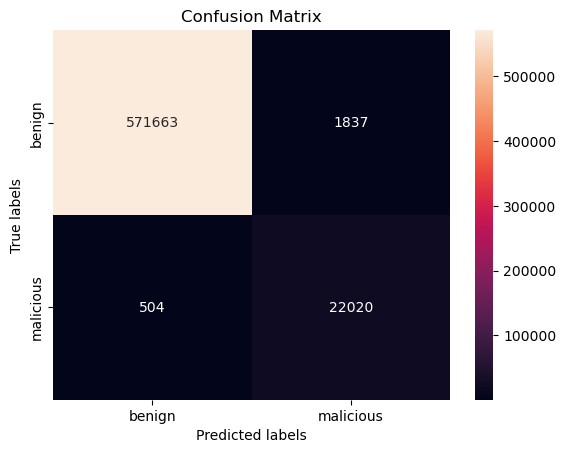

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap([[tn, fp],[fn, tp]], annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['benign', 'malicious']); ax.yaxis.set_ticklabels(['benign', 'malicious']);

In [41]:
tn

572199

In [ ]:
tn_nn, fp_nn, fn_nn, tp_nn =  598